# Segment + analyze blobs
In this notebook we demonstrate how images can be processed on GPUs, objects segmented and afterwards measured with [scikit-image](https://scikit-image.org/).

In [1]:
import pyclesperanto as cle

from skimage.io import imread
from skimage.measure import regionprops_table
import pandas as pd

pyclesperanto version: 0.6.2a1


We first load an image using scikit-image's `imread()` function and visualize it using clesperanto's `imshow()` funciton, that under the hood uses similar functionality like scikit-image for showing images.

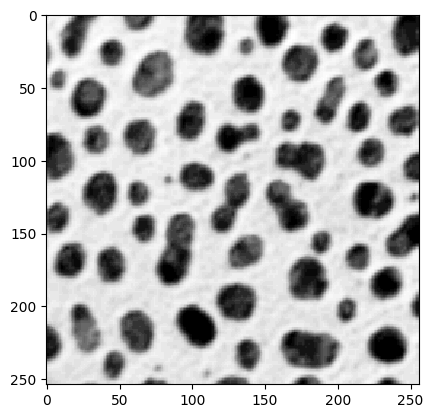

In [2]:
image = imread("https://imagej.nih.gov/ij/images/blobs.gif")

cle.imshow(image)

We invert the image

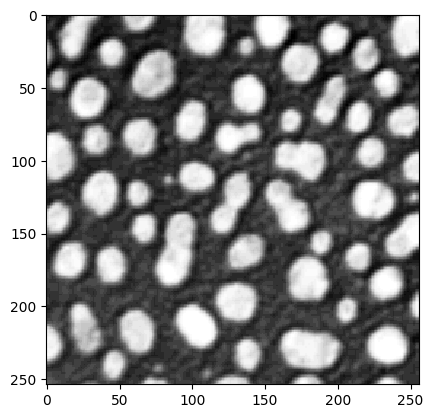

In [3]:
inverted_image = cle.subtract_image_from_scalar(image, scalar=255)

cle.imshow(inverted_image)

We can blur this image using a `gaussian_blur` filter. All filters and image processing operations are available via the `cle.` gateway. 

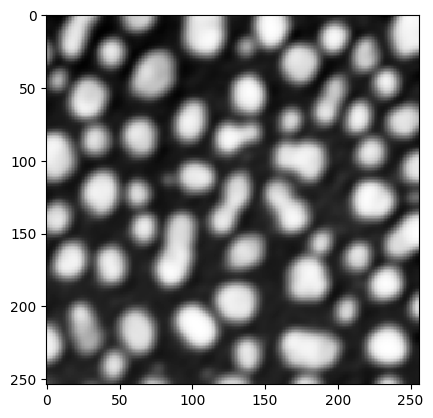

In [4]:
blurred_image = cle.gaussian_blur(inverted_image, sigma_x=3, sigma_y=3)

cle.imshow(blurred_image)

Also thresholding and connected component labeling work similarly via the `cle` gateway. Furthermore, the `imshow` function has some convenience built-in for visualizing label images of segmented blobs.

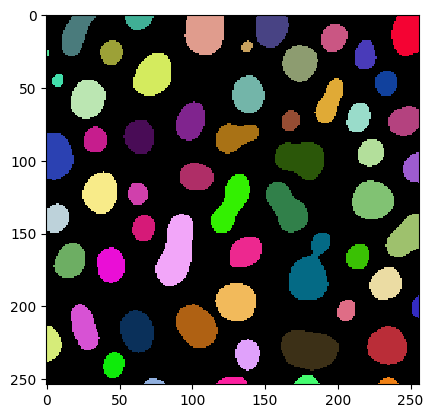

In [5]:
binary_image = cle.threshold_otsu(blurred_image)
label_image = cle.connected_components_labeling_box(binary_image)
cle.imshow(label_image, labels=True)

Before we can pass the resulting label image to another function, e.g. from scikit-image, we need to pull it back to CPU memory and with that convert it into a numpy array.

In [6]:
numpy_label_image = cle.pull(label_image)

table = regionprops_table(image, numpy_label_image, properties=['label', 'area', 'mean_intensity'])
pd.DataFrame(table)

,label,area,mean_intensity
0,7,1364,33.557186
1,15,774,28.383720
2,23,1778,29.212599
3,31,1568,29.829082
4,39,2373,29.473240
5,47,2037,30.416298
6,55,2220,29.781982
7,63,1609,29.183344
8,71,1614,28.018587
9,79,1209,28.527708
